# Semana 8 do Aceleradev DS Codenation

### Professor: Kazuki Yokoyama | Tema: Modelagem e Regressão

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sct
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
np.random.seed(1000)

### Regressao Linear

Aqui, falaremos do modelo mais simples e mais usado de predição. Trazendo os significados de conceitos importantes sobre o tema.

![regressoes](https://cdn-images-1.medium.com/max/800/1*_7OPgojau8hkiPUiHoGK_w.png)

Logo de cara, já temos 3 resultados possíveis que um modelo de regressão pode gerar. Esses resultados tem relação com *Trade-Off* e *Viés-Variância*.

### Trade-Off Viés-Variância

O erro cometido por um modelo pode ser dividido em 3 partes:

$$\mathbb{E}[(f(x) - \hat{f}(x))^{2}] = \underbrace{\text{Bias}(\hat{f}(x))^{2}}_{\text{viés}} + \underbrace{\text{Var}[\hat{f}(x)]}_{\text{variância}} + \underbrace{\varepsilon^{2}}_{\text{erro irredutível}}$$

- Viés: esse vem da escolha do modelo. Quando temos um *dataset* não linear, mas usamos uma regressão linear para tentar predizer algo sobre ele, estamos introduzindo um viés ao modelo. No caso, esse viés é a **simplicidade do modelo perante a complexidade dos dados**. Ou seja, o algoritmo *não apendem* muito bem, não capta as variações legítimas dos dados, gerando um **Underfitting**.

- Variância: essa é o oposto. Ocorre quando usamos **um modelo muito complexo em um *dataset* com linearidade baixa**. O resultado se parece muito com uma interpolação de grau $n-1$, sendo n o número de pontos. Nesse cenário, o modelo gera um **Overfitting**. Parece que os algorítmos *decoraram* os dados de treino, obtendo um *superaprendizado*, **ele não aprende a generalizar**. Reflexo disso é o *fit* gerado apresentar baixa variação nos dados de treino e alta variação nos dados de teste.

- erro irreditível: é o erro inerente à regressão linear. Não tem como mitigá-lo.

Eu creio que foi possível perceber que o viés e a variância são antagônicos: se vc aumenta um, diminui o outro (por isso se chama *trade-off*). E visto como um modelo se equilibra nessas 3 partes. O que fazemos? Nesse equilíbrio entre viés/variância, podemos ter 2 cenários críticos:

- modelo com baixa flexibilidade: ocorre quando o **viés está alto, mas a variância está baixa**. Nesse cenário, **o modelo erra muito quando são *inputados* os dados de teste** devido ao *underfitting*,

- modelo com alta flexibilidade: ocorre quando o **viés está baixo, mas a variância está alta**. Aí entramos no estágio de *overfitting*, onde o modelo começa a errar bastante com os dados de teste.

Como eu dei ênfase nos dados de teste, deu pra perceber que é nesse momento que avaliamos se um modelo está bom ou não, é o erro nessa fase que conta, pois é nessa hora que o modelo treinado encara valores que ele não conhece, e a idéia de *treinamento* é justamente essa: ter uma boa performance com dados que o modelo não conhece. E a chave é encontrar o equilíbrio entre viés/variância, para que o modelo erre o dentro do aceitável de erro (cada problema tem sua régua de erro).

### Modelo de Regressão Linear

**Objetivo do modelo:** previsão de uma variável **dependente** através de variáveis **independentes**. Vale ressaltar que, embora se chame regressão linear, não são apenas retas que o modelo gera, ele é capaz de gerar *fit*  não lineares também, como um polinômio por exemplo.

**Modelo Teórico Simples:** Para enterdermos, vamos começar com um problema de regressão de apenas uma variável independente. Podemos escrever que o valor esperado da variável independente $Y$ para um dado $X_i$ de $X$ é:

$$\mathbb{E}(Y|X_i)=f(X_i)$$

Tomando que $f(X)$ é **linear**, temos:

$$f(X)=\beta_0+\beta_1X \text{, sendo chamada de FRP(Função de Regressão Populacional)}$$

Como de praxe, para um dado valor de $X$, existe um valor de $Y$. Assim, para não trabalharmos com o valor populacional, devemos introduzir um erro à equação caso usemos uma amostra:

$$y_i=f(X_i)=\beta_0+\beta_1X_i+e_i \text{, sendo chamada de FRA(Função de Regressão Amostral)}$$

E o erro $e_i$ relaciona-se com $Y_i$ através de $y_i$ da seguinte maneira:

$$e_i=Y_i-y_i$$

Imagine que temos várias observações de $X$. Portanto, teremos vários pares ordenados $(X_i,Y_i)$. Como usamos sempre amostras para treinar modelos, quando essa equação encontra dados de teste, sempre terá um erro $\epsilon_i$ associado a cada valor. Podemos escrever esse erro da seguinte maneira:

$$\text{RSS} = \sum_{1 \leq i \leq n} e_{i}^{2} = \sum_{1 \leq i \leq n} (Y_{i} - {y}_{i})^{2}\text{, sendo Residual Sum of Squares}$$

No caso da regressão, procura-se por uma curva que **minimize** o MSE(Mean Square Error):

$$\text{MSE} = \frac{1}{n} \sum_{1 \leq i \leq n} e_{i}^{2} = \frac{1}{n} \sum_{1 \leq i \leq n} (Y_{i} - {y}_{i})^{2}$$

ou seja:

$$\underset{\hat{\beta}_{0}, \hat{\beta}_{2}, \cdots, \hat{\beta}_{p}}{\text{minimizar}} \text{MSE} = \frac{1}{n} \sum_{1 \leq i \leq n} (Y_{i} - \hat{\beta}_{0} - \sum_{1 \leq j \leq p} \hat{\beta}_{j}x_{ij})^{2}$$

E para avaliar o nosso modelo após treiná-lo, temos o RMSE(Root Mean Square Error):

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{1 \leq i \leq n} e_{i}^{2} = \sum_{1 \leq i \leq n} (Y_{i} - {y}_{i})^{2}}$$

Para ilustrar:

![residual](https://uc-r.github.io/public/images/analytics/regression/sq.errors-1.png)

*Repare:* os pontos **vermelhos** representam as posições reais dos pontos de teste, as retas **pretas** representam o MSE, e a **linha azul** representa o lugar geométrico onde MSE é mínimo.

**Modelo Teórico Geral:** podemos extrapolar essa idéia para um problema de várias variáveis agora. Vamos imaginar uma mesmo variável dependente $Y$ que se relaciona **linearmente** com as variáveis independentes de $\Omega=[X_1,X_2, \dots, X_p]$. Então, podemos escrever $Y$ como uma **combinação linear** de $\Omega$:

$$Y(X_1,X_2,\dots,X_p)=\beta_0+\beta_1X_1+\beta_2X_2+\dots+\beta_pX_p$$

*Nota:* perceba que cada $X_p$ tem seu conjunto de valores, ou seja: cada um é uma *feature*



### Prática em Regressão

vamos importar o *dataset* Boston house prices dataset

In [2]:
boston_dataset = load_boston()

In [32]:
features = boston_dataset.data

In [33]:
target = boston_dataset.target

In [38]:
pd.DataFrame(features, columns=boston_dataset.feature_names).join(pd.Series(target, name='TARGET')).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Separando dados para treino e teste**

para fazer isso, usamos uma função do `sklearn.model_selection`

```python
sklearn.model_selection.train_test_split(*arrays, test_size=, random_state=)
```
*Parâmetros:*

- arrays: aqui vc coloca X com as *features* e Y com o *target*
- test_size:
    - int: representa o número absoluto de amostras de teste
    - float: valor dentro de [0,1] que representa a proporção dos dados que vai ser usada para teste
- random_state: int que representa alguma coisa de embaralhamento dos dados

*O que retorna:*

retorna uma lista de arrays na seguinte ordem: x_treino, x_teste, y_treino, y_teste

In [42]:
x_treino, x_teste, y_treino, y_teste = train_test_split(boston_dataset.data, boston_dataset.target, test_size=.2, random_state=42)

**Treinamento do modelo de regressão linear**

Vamos treinar com todas as *features*

In [51]:
regressor = LinearRegression()

In [68]:
regressor.fit(x_treino, y_treino)

LinearRegression()

O modelo linear foi treinado de acordo com as *features* de treino e *target*. **NÃO SE TREINA UM MODELO COM DADOS DE TESTE**

Podemos resgatar algumas informações interessantes como:

Coeficientes $\beta_1, \beta_2, \dots, \beta_{13}$

In [69]:
regressor.coef_

array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

Termo independente $\beta_0$

In [74]:
regressor.intercept_

30.246750993923513

**Prevendo valores do *target* através dos dados de teste**

Agora usamos nossos dados de teste

In [76]:
previsto = regressor.predict(x_teste)

In [78]:
previsto[:5]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992])

**Comparando com os valores esperados**

In [81]:
y_teste[:5]

array([23.6, 32.4, 13.6, 22.8, 16.1])

percebe-se que não estão muito parecidos. Embora seja possível constatar visualmente que o predito não está bom, podemos usar as medidas de erro aprendidas nesse notebook

**MSE - Mean Squared Error**

Seu valor é sempre não negativo, e considera a **Média** dos erros. Como toda média, sofre com valores extremos. Ou seja, se você não tratou os *outliers* antes, essa medida será afetada. Quanto mais próximo do zero, melhor é a performance do modelo. Entretanto, seu valor sozinho só serve para **comparar modelos**, caso você gere modelos diferentes, ou o mesmo modelo, mas com *features* diferentes, usar o MSE é uma boa para dizer que modelo está melhor que o outro

In [86]:
mean_squared_error(y_true=y_teste, y_pred=previsto)

24.291119474973588

**MedSE - Median Squared Error**

Seu valor pode assumir qualquer valor Real. Essa medida de erro busca a **Mediana** dos erros de cada ponto, e é mais resistente aos *outliers*. Tal qual o MSE, seu valor sozinho é bom para comparação entre de modelos de regressão.

In [85]:
median_absolute_error(y_true=y_teste, y_pred=previsto)

2.32433190641245

**Coeficiente de Determinação $R^2$**

Valor compreendido no intervalo [0,1]. Sua maneira de interpretar é simples: seu resultado reflete a proporção dos valores que o modelo consegue explicar.

*Nota*: se for usar essa medida para comparar modelos diferentes, certifique-se que eles foram treinados com o mesmo número de variáveis, pois essa métrica aumenta seu valor à medida que se aumenta o número de features, ai não dá pra saber se, de fato, um modelo explica mais sobre os dados porque é bom ou porque tem mais variáveis

*Nota 2*: o $R^2$ pode apresentar valores negativos se não tiver o intercepto incluso no modelo. Caso isso aconteça, repare na classe LinearRegression() se o parâmetro do intercepto está *setado*

In [90]:
r2_score(y_true=y_teste, y_pred=previsto)

0.668759493535631

Portanto, esse modelo explica 66,88% da variação dos dados

**Modo gráfico**

Visualmente, podemos perceber se escolhemos boas variáveis para o modelo aprender sobre o `Target`, basta confrontar os valores do `Target` de teste com os valores previstos através do modelo

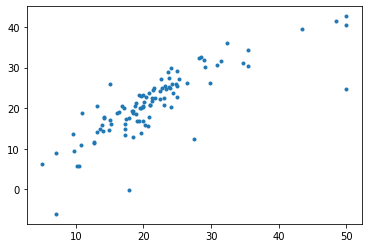

In [102]:
plt.plot(y_teste, previsto, '.')
plt.show()

É possível perceber que existe uma linearidade, e que a falta de tratamento dos *outliers*, bem como a não padronização/normalização dos dados, está derrubando a performance do modelo

**Prevendo o valor de uma tupla**

Só para segmentar, o valor previsto do *target* é descrito como a combinação linear das variáveis escolhidas para o modelo. E nesse processo de treino, obteve-se um array de coeficientes $\beta_1, \beta_2, \dots, \beta_{13}$. Repare: podemos decompor a equação da combinação linear numa multiplicação de matrizes. Veja:

$$target(X_1,\dots,X_{13})=\beta_0+\beta_1X_1+\dots+\beta_{13}X_{13}=\beta_0+\begin{bmatrix}\beta_1&\dots&\beta_{13}\end{bmatrix}\begin{bmatrix}X_1\\ \vdots\\ X_{13}\end{bmatrix}$$

Assim, se eu quiser saber o valor de previsão de uma tupla, basta eu fazer um **produto escalar** entre o vetor da tupla e o vetor de coeficientes. Então, vamos descobrir o valor do `Target` da primera tupla do *set* de treino

In [101]:
beta_0 = regressor.intercept_
target_tupla_000 = beta_0 + x_treino[0, :].dot(regressor.coef_)
target_tupla_000

10.969524053507278